In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [2]:
crime_data = pd.read_csv('Crime_Data_from_2020_to_present.csv')

In [4]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [5]:
crime_data.count()

DR_NO             761582
Date Rptd         761582
DATE OCC          761582
TIME OCC          761582
AREA              761582
AREA NAME         761582
Rpt Dist No       761582
Part 1-2          761582
Crm Cd            761582
Crm Cd Desc       761582
Mocodes           657013
Vict Age          761582
Vict Sex          662009
Vict Descent      662003
Premis Cd         761573
Premis Desc       761138
Weapon Used Cd    264752
Weapon Desc       264752
Status            761582
Status Desc       761582
Crm Cd 1          761572
Crm Cd 2           56342
Crm Cd 3            1875
Crm Cd 4              57
LOCATION          761582
Cross Street      122391
LAT               761582
LON               761582
dtype: int64

In [46]:

crime_data['Status']

0         AO
1         IC
2         AA
3         IC
4         IC
          ..
761577    IC
761578    IC
761579    IC
761580    IC
761581    IC
Name: Status, Length: 761582, dtype: object

In [3]:
times = []
for time in crime_data['TIME OCC']:
    time_str = str(time)
    if len(time_str) == 1:
        converted_time = f"00:0{time_str[-1]}:00"
    elif len(time_str) == 2:
        converted_time = f"00:{time_str[-2:]}:00"
    elif len(time_str) == 3:
        converted_time = f"0{time_str[-3]}:{time_str[-2:]}:00"
    else:
        converted_time = f"{time_str[-4:-2]}:{time_str[-2:]}:00"
    times.append(converted_time)


In [5]:
#pd.to_datetime(times[0:6])
#pd.to_datetime(crime_data['DATE OCC']. + times)
crime_data['dt'] = pd.to_datetime(pd.to_datetime(crime_data['DATE OCC']).astype(str) + ' ' + times)

In [9]:
crime_data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'dt'],
      dtype='object')

In [47]:
crime_df = crime_data.drop(['DR_NO','Date Rptd','Crm Cd','Crm Cd 1','Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4','Part 1-2','Mocodes','Premis Cd', 
        'Premis Desc','Weapon Used Cd', 'Weapon Desc','Cross Street','Status', 'Status Desc','Rpt Dist No','DATE OCC'], axis=1,)
crime_df

,TIME OCC,AREA,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,LOCATION,LAT,LON,dt
0,2230,3,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,1100 W 39TH PL,34.0141,-118.2978,2020-01-08 22:30:00
1,330,1,Central,BATTERY - SIMPLE ASSAULT,25,M,H,700 S HILL ST,34.0459,-118.2545,2020-01-01 03:30:00
2,1200,1,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,200 E 6TH ST,34.0448,-118.2474,2020-02-13 12:00:00
3,1730,15,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,5400 CORTEEN PL,34.1685,-118.4019,2020-01-01 17:30:00
4,415,19,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,14400 TITUS ST,34.2198,-118.4468,2020-01-01 04:15:00
...,...,...,...,...,...,...,...,...,...,...,...
761577,1800,16,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,12500 BRANFORD ST,34.2466,-118.4054,2023-01-26 18:00:00
761578,1000,16,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,12800 FILMORE ST,34.2790,-118.4116,2023-03-22 10:00:00
761579,1630,12,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,6100 S VERMONT AV,33.9841,-118.2915,2023-04-12 16:30:00
761580,1,1,Central,PICKPOCKET,24,F,H,500 S MAIN ST,34.0467,-118.2485,2023-07-01 00:01:00


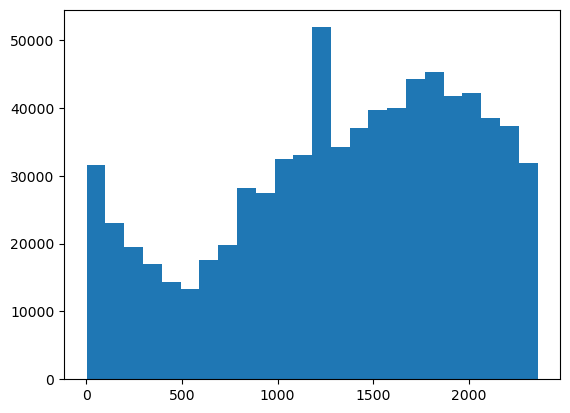

(array([29043.,  1991.,  2616.,  2120.,  1323.,  7285.,  1972.,  2431.,
         2010.,  1109.]),
 array([1200. , 1205.9, 1211.8, 1217.7, 1223.6, 1229.5, 1235.4, 1241.3,
        1247.2, 1253.1, 1259. ]),
 <BarContainer object of 10 artists>)

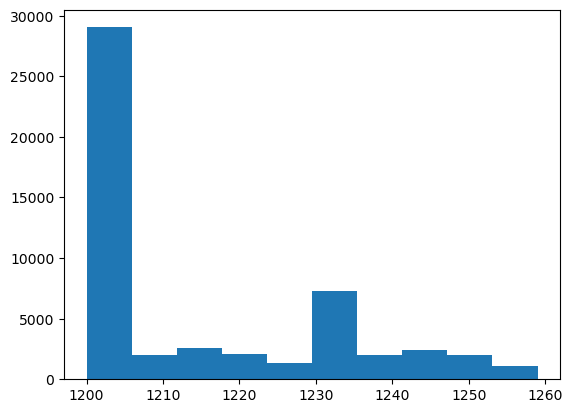

In [45]:
plt.hist(crime_df['TIME OCC'],24)
plt.show()
statistics.mode(crime_df['TIME OCC'])
plt.hist(crime_df.loc[(crime_df['TIME OCC'] >= 1200) & (crime_df['TIME OCC'] < 1300),'TIME OCC'])
#peaks at 12 and 6

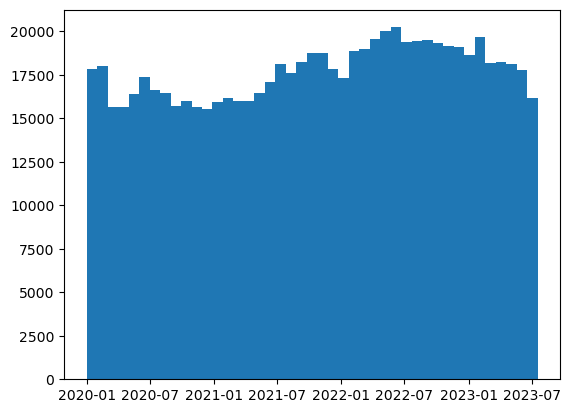

In [51]:
plt.hist(crime_df['dt'],43)
plt.show()

In [59]:
crime_df['dt'][1].weekday()
weekday = [crime_df['dt'][i].weekday() for i in range(len(crime_df))]

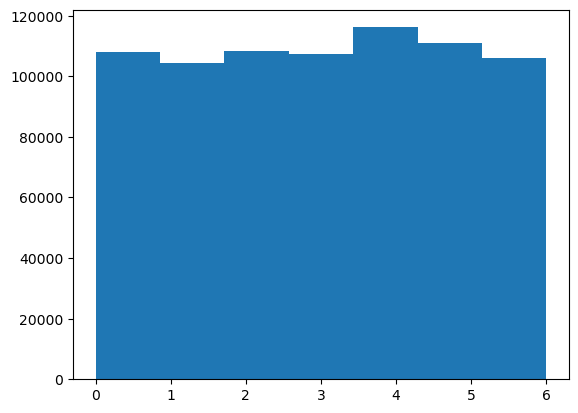

In [62]:
plt.hist(weekday,7)
plt.show()
#slightly more on Friday

In [65]:
crime_df['Crm Cd Desc'].unique()

array(['BATTERY - SIMPLE ASSAULT',
       'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'RAPE, FORCIBLE', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'OTHER MISCELLANEOUS CRIME',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BURGLARY FROM VEHICLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'ARSON', 'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)', 'THEFT OF IDENTITY',
       'ROBBERY', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'BURGLARY', 'VEHICLE - STOLEN',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'BRANDISH WEAPON', 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'BUNCO, GRAND THEFT', 'THEFT, PERSON',
       'BATTERY WITH SEXUAL CONTACT', 'BIKE - STOLEN',
       'BATTERY POLICE (SIMPLE)',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'VIOLAT

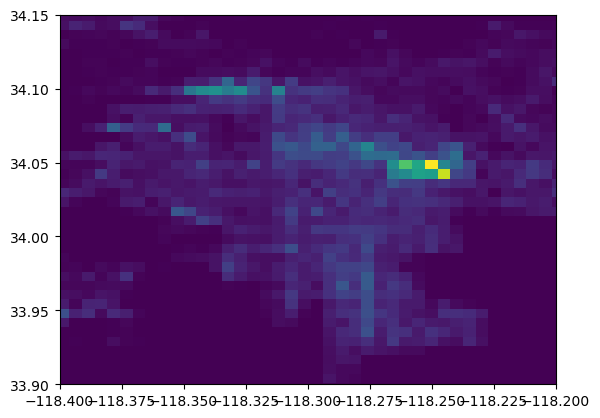

In [86]:
crime_df_loc = crime_df[(crime_df['LAT'] != 0) & (crime_df['LON'] != 0)]
plt.hist2d(crime_df_loc['LON'],crime_df_loc['LAT'],bins=(100,100))
plt.xlim(-118.4,-118.2)
plt.ylim(33.9,34.15)
plt.show()

In [78]:
max(crime_df_loc['LON']) - min(crime_df_loc['LON'])
max(crime_df_loc['LAT']) - min(crime_df_loc['LAT'])

0.6281999999999996